In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import GLM_Fitter, Marr2Algorithms, make_LM, Abstract_1D_Model
from csv_analysis import make_regression_plots
import numpy as np
import seaborn as sb
import sys
import math
from scipy.stats import wilcoxon, ttest_1samp, mannwhitneyu, pearsonr, entropy, norm, mode
from scipy.ndimage import gaussian_filter
from scipy.special import kl_div
from IPython.display import HTML
#sb.set()
import matplotlib
from matplotlib import animation as anim
from matplotlib import rc
sb.set()
husl = sb.color_palette("husl", 8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})
matplotlib.rcParams['pdf.fonttype'] = 42

from matplotlib import pyplot as pl
from collections import Counter
from iventure.utils_bql import query
np.random.seed()
%matplotlib inline

In [4]:
# there's some level of noise you can't get around, which is why doing tungsten needle surgery is really difficult. 
# this is the y-intercept of the standard deviation fit. 

# if fixed noise is bigger than the goal, you are fucked. this is why you need a slightly larger than 0 degree
# strike zone. this is probably why the standard deviation of the strike zone definitively matches the fixed noise. 

# proportional noise is what you'd expect as an error from long distances, which require more complex movements, 
# than short distances, which require simpler movements. 

#start_value = 5
#strike_bounds = [.1, 1]
#proportion = .87
#std_equation = [ 0.13688676, 0.03379371]
#bias = -5.9 * .0106
#fixed_noise = .137 + .034

start_value = 100
strike_bounds = [-7, 7]
proportion = .53
std_equation = [.36, 7.62]
bias = 0
fixed_noise = 7.62 + .36


ab_1D_static = Abstract_1D_Model(strike_bounds, proportion, bias, 'static', start_value, std_equation)
ab_1D_fixednoise = Abstract_1D_Model(strike_bounds, proportion, bias, 'fixed noise', start_value, std_equation, fixed_noise)
ab_1D_propnoise = Abstract_1D_Model(strike_bounds, proportion, bias, 'prop noise', start_value, std_equation)

In [5]:
num_iter = 500
ab_1D_static.transform_loop(num_iter)
ab_1D_fixednoise.transform_loop(num_iter)
ab_1D_propnoise.transform_loop(num_iter)

In [6]:
print np.median(ab_1D_static.num_steps)
print np.median(ab_1D_fixednoise.num_steps)
print np.median(ab_1D_propnoise.num_steps)

print mode(ab_1D_static.num_steps)
print mode(ab_1D_fixednoise.num_steps)
print mode(ab_1D_propnoise.num_steps)

5.0
5.0
4.0
ModeResult(mode=array([5]), count=array([500]))
ModeResult(mode=array([4]), count=array([152]))
ModeResult(mode=array([3]), count=array([86]))


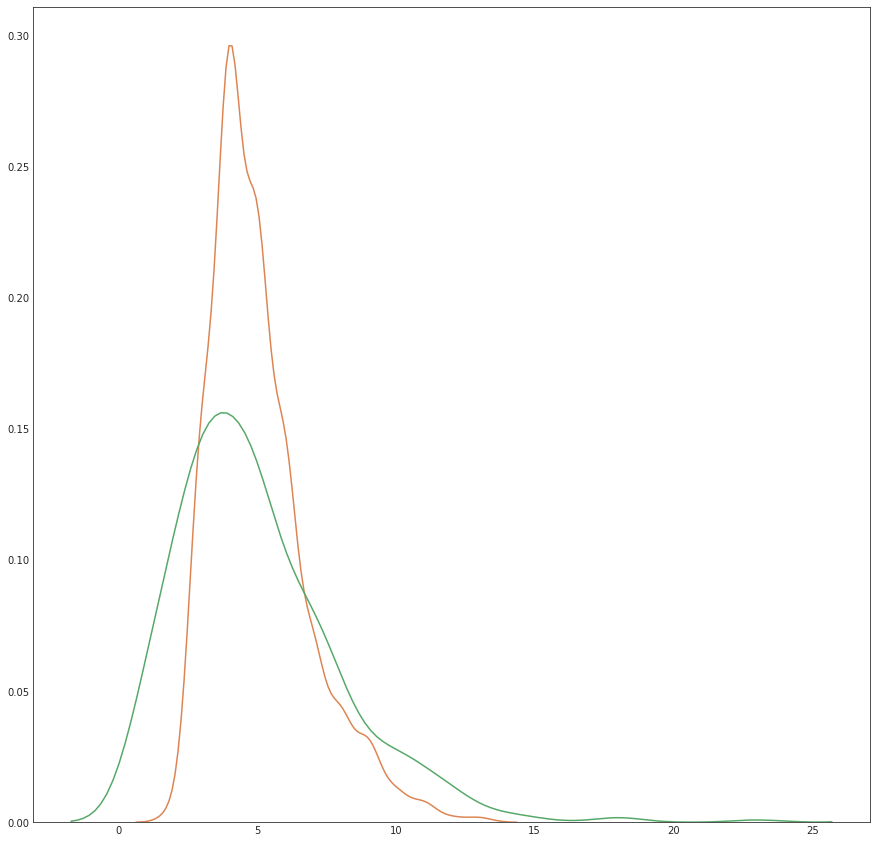

In [7]:
fig, ax = pl.subplots(1,1, figsize=(15,15))
#sb.kdeplot(ab_1D_static.num_steps, ax=ax, color=cp[0])
#print ab_1D_static.num_steps
sb.kdeplot(ab_1D_fixednoise.num_steps, ax=ax, color=cp[1])
sb.kdeplot(ab_1D_propnoise.num_steps, ax=ax, color=cp[2])

setting up graph


setting up graph


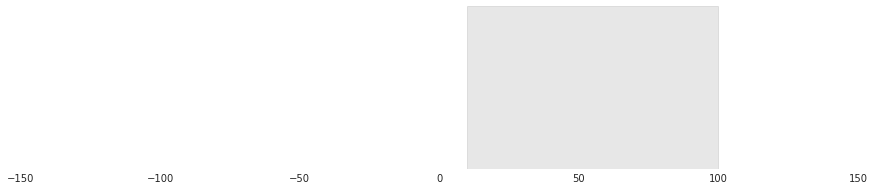

In [6]:
ani = ab_1D_propnoise.step_plotter(0, [-150, 150])
#ani = ab_1D_static.step_plotter(0)
#ani = step_plotter(ab_1D_propnoise)
rc('animation', html='jshtml')
ani
#ani.save('static_transform.html')